In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df =sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [5]:
df['smoker']=lb.fit_transform(df['smoker'])
df['sex']=lb.fit_transform(df['sex'])
df['time']=lb.fit_transform(df['time'])
df['day']=lb.fit_transform(df['day'])



In [6]:
df.dtypes

total_bill    float64
tip           float64
sex             int32
smoker          int32
day             int32
time            int32
size            int64
dtype: object

In [7]:
df.corr()

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.675734,0.144877,0.085721,-0.043550,-0.183118,0.598315
tip,0.675734,1.000000,0.088862,0.005929,-0.011548,-0.121629,0.489299
sex,0.144877,0.088862,1.000000,0.002816,-0.078292,-0.205231,0.086195
smoker,0.085721,0.005929,0.002816,1.000000,-0.282721,-0.054921,-0.133178
day,-0.043550,-0.011548,-0.078292,-0.282721,1.000000,0.638019,0.069510
time,-0.183118,-0.121629,-0.205231,-0.054921,0.638019,1.000000,-0.103411
size,0.598315,0.489299,0.086195,-0.133178,0.069510,-0.103411,1.000000


In [8]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3


In [9]:
import matplotlib.pyplot as plt

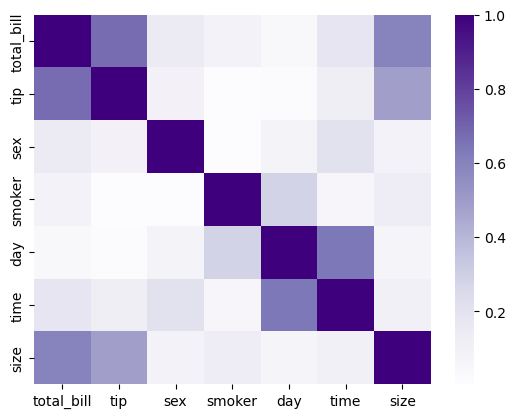

In [10]:
sns.heatmap(np.abs(df.corr()),cmap='Purples')
plt.show()

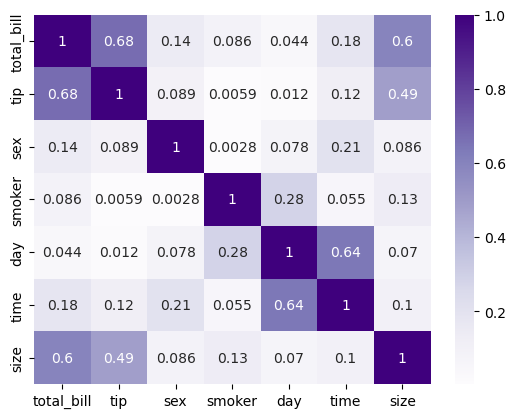

In [11]:
sns.heatmap(np.abs(df.corr()),cmap='Purples',annot=True)
plt.show()

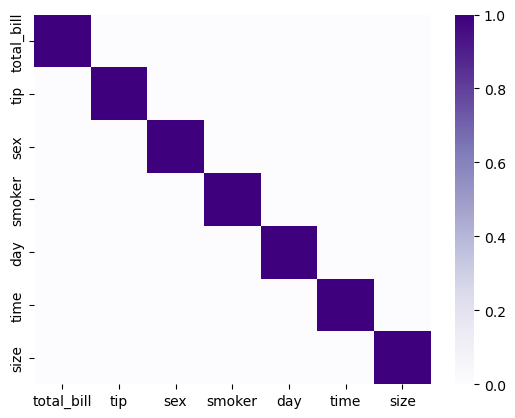

In [12]:
sns.heatmap(np.abs(df.corr())>0.7,cmap='Purples')
plt.show()

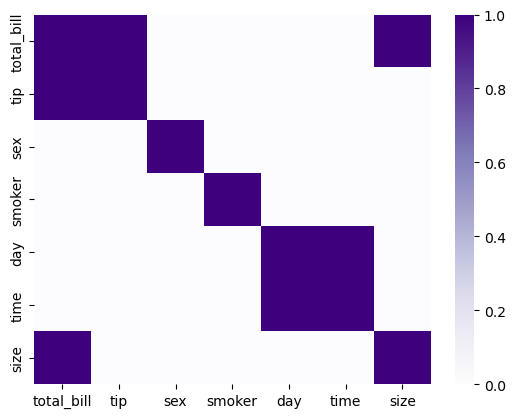

In [13]:
sns.heatmap(np.abs(df.corr())>0.5,cmap='Purples')
plt.show()

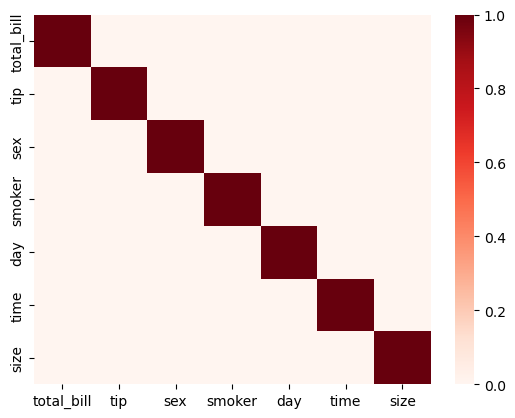

In [14]:
sns.heatmap(np.abs(df.corr())>0.7,cmap='Reds')
plt.show()

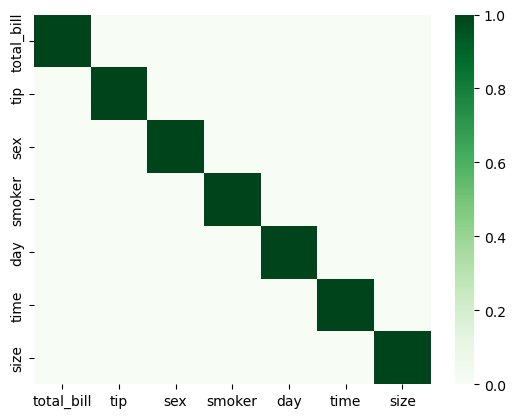

In [15]:
sns.heatmap(np.abs(df.corr())>0.7,cmap='Greens')
plt.show()

In [16]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


In [17]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.741803,0.278689,2.569672
std,8.902412,1.383638,0.479967,0.486667,0.926815,0.449276,0.951100
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [18]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [19]:
scale_array=std_scaler.fit_transform(df)

In [20]:
scale_array.shape

(244, 7)

In [21]:
scale_df=pd.DataFrame(scale_array,columns=df.columns)
scale_df

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,-1.439947,-1.343353,-0.784789,0.279158,-0.621582,-0.600193
1,-1.063235,-0.969205,0.744406,-0.784789,0.279158,-0.621582,0.453383
2,0.137780,0.363356,0.744406,-0.784789,0.279158,-0.621582,0.453383
3,0.438315,0.225754,0.744406,-0.784789,0.279158,-0.621582,-0.600193
4,0.540745,0.443020,-1.343353,-0.784789,0.279158,-0.621582,1.506958
...,...,...,...,...,...,...,...
239,1.040511,2.115963,0.744406,-0.784789,-0.802024,-0.621582,0.453383
240,0.832275,-0.722971,-1.343353,1.274228,-0.802024,-0.621582,-0.600193
241,0.324630,-0.722971,0.744406,1.274228,-0.802024,-0.621582,-0.600193
242,-0.221287,-0.904026,0.744406,-0.784789,-0.802024,-0.621582,-0.600193


In [22]:
scale_df=pd.DataFrame(scale_array,columns=df.columns)
scale_df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,-1.439947,-1.343353,-0.784789,0.279158,-0.621582,-0.600193
1,-1.063235,-0.969205,0.744406,-0.784789,0.279158,-0.621582,0.453383
2,0.137780,0.363356,0.744406,-0.784789,0.279158,-0.621582,0.453383


In [25]:
scale_df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02,244.000000,2.440000e+02
mean,-7.871663e-17,2.839259e-16,-2.912060e-17,8.736181e-17,-1.456030e-16,0.000000,-5.824121e-17
std,1.002056e+00,1.002056e+00,1.002056e+00,1.002056e+00,1.002056e+00,1.002056,1.002056e+00
min,-1.881547e+00,-1.447189e+00,-1.343353e+00,-7.847892e-01,-1.883206e+00,-0.621582,-1.653768e+00
25%,-7.247111e-01,-7.229713e-01,-1.343353e+00,-7.847892e-01,-8.020242e-01,-0.621582,-6.001926e-01
50%,-2.241005e-01,-7.117518e-02,7.444059e-01,-7.847892e-01,2.791576e-01,-0.621582,-6.001926e-01
75%,4.886857e-01,4.086192e-01,7.444059e-01,1.274228e+00,1.360339e+00,1.608799,4.533829e-01
max,3.492068e+00,5.070772e+00,7.444059e-01,1.274228e+00,1.360339e+00,1.608799,3.614110e+00


In [28]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.741803,0.278689,2.569672
std,8.902412,1.383638,0.479967,0.486667,0.926815,0.449276,0.951100
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [31]:
scale_df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,-1.439947,-1.343353,-0.784789,0.279158,-0.621582,-0.600193
1,-1.063235,-0.969205,0.744406,-0.784789,0.279158,-0.621582,0.453383
2,0.137780,0.363356,0.744406,-0.784789,0.279158,-0.621582,0.453383
3,0.438315,0.225754,0.744406,-0.784789,0.279158,-0.621582,-0.600193
4,0.540745,0.443020,-1.343353,-0.784789,0.279158,-0.621582,1.506958


In [32]:
from sklearn.preprocessing import MinMaxScaler
mx_scaler=MinMaxScaler()

In [33]:
mx_array=mx_scaler.fit_transform(df)

In [34]:
type(mx_array)

numpy.ndarray

In [35]:
mx_array

array([[0.29157939, 0.00111111, 0.        , ..., 0.66666667, 0.        ,
        0.2       ],
       [0.1522832 , 0.07333333, 1.        , ..., 0.66666667, 0.        ,
        0.4       ],
       [0.3757855 , 0.27777778, 1.        , ..., 0.66666667, 0.        ,
        0.4       ],
       ...,
       [0.41055718, 0.11111111, 1.        , ..., 0.33333333, 0.        ,
        0.2       ],
       [0.30896523, 0.08333333, 1.        , ..., 0.33333333, 0.        ,
        0.2       ],
       [0.32907415, 0.22222222, 0.        , ..., 1.        , 0.        ,
        0.2       ]])

In [44]:
pd.DataFrame(scale_array,columns=df.columns)

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,-1.439947,-1.343353,-0.784789,0.279158,-0.621582,-0.600193
1,-1.063235,-0.969205,0.744406,-0.784789,0.279158,-0.621582,0.453383
2,0.137780,0.363356,0.744406,-0.784789,0.279158,-0.621582,0.453383
3,0.438315,0.225754,0.744406,-0.784789,0.279158,-0.621582,-0.600193
4,0.540745,0.443020,-1.343353,-0.784789,0.279158,-0.621582,1.506958
...,...,...,...,...,...,...,...
239,1.040511,2.115963,0.744406,-0.784789,-0.802024,-0.621582,0.453383
240,0.832275,-0.722971,-1.343353,1.274228,-0.802024,-0.621582,-0.600193
241,0.324630,-0.722971,0.744406,1.274228,-0.802024,-0.621582,-0.600193
242,-0.221287,-0.904026,0.744406,-0.784789,-0.802024,-0.621582,-0.600193


In [45]:
mx_df=pd.DataFrame(mx_array,columns=df.columns)
mx_df

,total_bill,tip,sex,smoker,day,time,size
0,0.291579,0.001111,0.0,0.0,0.666667,0.0,0.2
1,0.152283,0.073333,1.0,0.0,0.666667,0.0,0.4
2,0.375786,0.277778,1.0,0.0,0.666667,0.0,0.4
3,0.431713,0.256667,1.0,0.0,0.666667,0.0,0.2
4,0.450775,0.290000,0.0,0.0,0.666667,0.0,0.6
...,...,...,...,...,...,...,...
239,0.543779,0.546667,1.0,0.0,0.333333,0.0,0.4
240,0.505027,0.111111,0.0,1.0,0.333333,0.0,0.2
241,0.410557,0.111111,1.0,1.0,0.333333,0.0,0.2
242,0.308965,0.083333,1.0,0.0,0.333333,0.0,0.2


In [46]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.741803,0.278689,2.569672
std,8.902412,1.383638,0.479967,0.486667,0.926815,0.449276,0.951100
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [47]:
mx_df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,0.350145,0.222031,0.643443,0.381148,0.580601,0.278689,0.313934
std,0.186477,0.153738,0.479967,0.486667,0.308938,0.449276,0.190220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.215281,0.111111,0.000000,0.000000,0.333333,0.000000,0.200000
50%,0.308442,0.211111,1.000000,0.000000,0.666667,0.000000,0.200000
75%,0.441087,0.284722,1.000000,1.000000,1.000000,1.000000,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


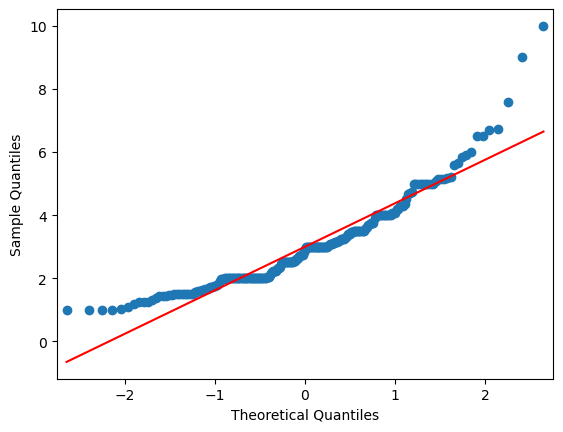

In [48]:
import statsmodels.api as sm
sm.qqplot(df['tip'],line='s')
plt.show()